# Final Evaluation
## Problem 4.

#### Loading the packages and reading the data.

In [1]:
from scipy import stats
import numpy as np
import pandas as pd 
import math
import random
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam

### Create a sample of points on the XY plane.

In [3]:
x_train = np.linspace(-20, 20, 500)
y_train = np.linspace(-20, 20, 500)
 
X, Y = np.meshgrid(x_train, y_train) #This will be only for the graph.

In [4]:
np.random.shuffle(x_train)
np.random.shuffle(y_train)

### Define the function of a cone on R^3.

In [5]:
def f(x,y):
        return np.sqrt(x**2+y**2)

### Calculate the z-coordinate evaluating in the function.

In [6]:
z_train = f(x_train,y_train)
Z = f(X,Y) #This will be only for the graph.

### Graphing the generated points and the real cone with an interactive plotter.

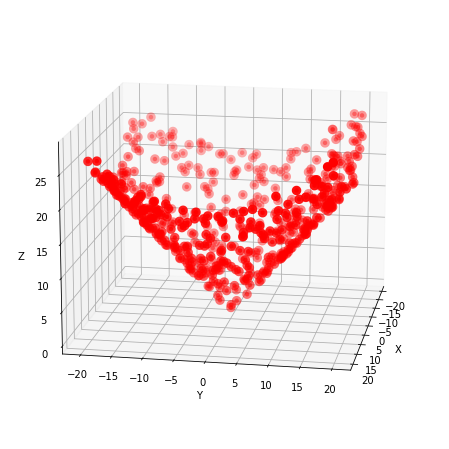

In [17]:
#def plotter_train(a,b):
fig = plt.figure(figsize=[12,8])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train, y_train, z_train, marker='o',linewidth=5,color='red')
#ax.plot_wireframe(X, Y, Z,
#                  linewidth=0.2,
#                  color='green'
                   #rstride = 10,
                  #cstride = 10
#                )
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(15, 10)
plt.show()

#from ipywidgets import interactive
#iplot = interactive(plotter_train,
#                   a = (-90,90,1),
#                   b = (-90,90,1))
#iplot

### Define the multilayer perceptron

In [20]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape = (2,) ))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))    
model.compile(optimizer='adam', loss='mean_squared_error')

In [21]:
xy_train = np.vstack((x_train, y_train)).T

### Adjust the model.

In [22]:
resultados = model.fit(xy_train, z_train, validation_split=0.3, epochs=500, verbose=0)

### Plotting the loss.

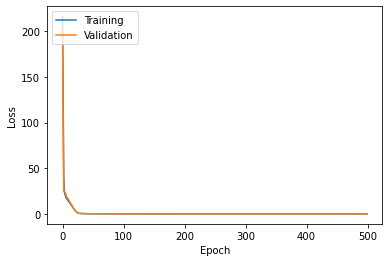

In [23]:
plt.plot(resultados.history['loss'])
plt.plot(resultados.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

### Predictions

Generate different data to produce a cone but with the perceptron.

In [24]:
x_test = np.linspace(-10, 10, 300)
y_test = np.linspace(-10, 10, 300)
np.random.shuffle(x_test)
np.random.shuffle(y_test)

In [25]:
xy_test = np.vstack((x_test, y_test)).T

In [26]:
pred = model.predict(xy_test)

### Graphing the results.

The green grid is the real cone and the blue points are those generated by the perceptron.

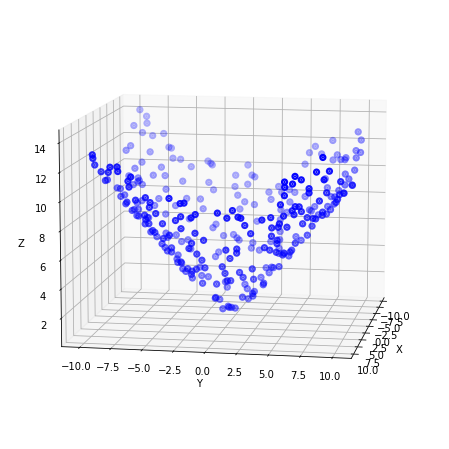

In [29]:
#def plotter_test(a,b):
fig = plt.figure(figsize=[12,8])
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(x_test, y_test, f(x_test,y_test).ravel(), marker='.',linewidth=5,color='red')
ax.scatter(x_test, y_test, model.predict(xy_test).ravel(), marker='.',linewidth=5,color='blue')
#ax.plot_wireframe(X, Y, Z,
#                  linewidth=0.2,
#                 color='green'
#                  ,rstride = 10,
#                  ,cstride = 10
#                 )
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(10, 10)
plt.show()

#iplot_test = interactive(plotter_test,
#                   a = (-90,90,1),
#                   b = (-90,90,1))
#iplot_test